# Weed Detection using YOLOv8

In [ ]:
from ultralytics import YOLO
import os
import yaml
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### Fine tune the YOLOv8s model (s = small)

In [ ]:
def fine_tune_model():

    # 1. Load model 
    model = YOLO("yolov8s.pt")

    #2. Prepare dataset configuration
    data_config = r"configs\args.yaml"

    # Validate dataset configurartion
    with open(data_config) as f:
        data = yaml.safe_load(f)
        print("Number of classes: ", data["nc"])
        print("Classes name: ", data["names"])
        print("Training images: ", data["train"])
        print("val images: ", data["val"])
        print("testing images: ", data["test"])

        # 3. Set training parameters
    training_params = {
        "data": data_config,
        "imgsz": 640,                   # Corrected from image_size
        "epochs": 80,
        "batch": 16,
        "optimizer": "auto",
        "lr0": 0.01,
        "lrf": 0.01,
        "weight_decay": 0.0005,
        "momentum": 0.937,
        "warmup_epochs": 3.0,           # Corrected from warm_epochs
        "warmup_momentum": 0.8,         # Corrected from warm_momentum
        "warmup_bias_lr": 0.1,          # Corrected from warm_bias_lr
        "box": 7.5,
        "cls": 0.5,
        "dfl": 1.5,
        "hsv_h": 0.015,
        "hsv_s": 0.7,
        "hsv_v": 0.4,
        "degrees": 0.0,
        "translate": 0.1,
        "scale": 0.5,
        "shear": 0.0,                   # Corrected from share
        "perspective": 0.0,
        "flipud": 0.0,
        "fliplr": 0.5,                  # Added missing parameter
        "mosaic": 1.0,
        "mixup": 0.0,
        "copy_paste": 0.0,
        "name": 'yolov8s_weed',
        "device": '0',
        "workers": 8,
        "project": 'weed_detection',
        "exist_ok": False,
        "pretrained": True,
        "verbose": True,
        "seed": 42,
        "deterministic": True,
        "single_cls": False,
        "rect": False,
        "cos_lr": False,
        "close_mosaic": 10,
        "resume": False,
    }
        # 4. Start fine-tuning process
    print("Starting fine-tuning process...")
    results = model.train(**training_params)

    # 5. Evaluate model on validation set
    print("\nEvaluating model performance...")
    metrics = model.val() 

    print(f"mAP50-95: {metrics.box.map}")
    print(f"mAP50: {metrics.box.map50}")
    print(f"mAP75: {metrics.box.map75}")

    # 6. Export model to different formats
    # Formats: 'torchscript', 'onxx', 'openvino', 'engine','coreml', 'saved_model', 'pb', 'tflite', 'edgetpu', 'tfjs'
        
    print("Exporting model to ONXX format...")
    model.export(format='onnx')

    print("\nFine-tuning process complated successfully.")
    return model

if __name__ == "__main__":
    trained_model = fine_tune_model()

Number of classes:  2
Classes name:  ['crop', 'weeds']
Training images:  images/train
val images:  images/val
testing images:  images/test
Starting fine-tuning process...
Ultralytics 8.3.127  Python-3.10.16 torch-2.5.1+cu121 CUDA:0 (NVIDIA RTX A6000, 49140MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=F:\ChaosAll\Weed Detection\agri_data\dataset\data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=80, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt,

train: Scanning F:\ChaosAll\Weed Detection\agri_data\dataset\labels\train.cache... 909 images, 0 backgrounds, 0 corrupt


val: Fast image access  (ping: 0.10.1 ms, read: 12.62.6 MB/s, size: 54.3 KB)


val: Scanning F:\ChaosAll\Weed Detection\agri_data\dataset\labels\val.cache... 391 images, 0 backgrounds, 0 corrupt: 10


Plotting labels to weed_detection\yolov8s_weed4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to weed_detection\yolov8s_weed4
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/80      3.71G      1.457      2.408      1.772         32        640: 100%|██████████| 57/57 [00:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.669      0.507        0.6      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/80      4.48G      1.476      1.586      1.731         33        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.171      0.331      0.164     0.0598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/80      4.49G      1.505      1.499      1.741         44        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.556       0.37      0.384      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/80      4.49G      1.522      1.506      1.759         39        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.325      0.367      0.274      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/80      4.49G      1.478      1.413      1.706         40        640: 100%|██████████| 57/57 [00:05<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634       0.46      0.529       0.48      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/80      4.49G      1.419      1.327      1.697         40        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01


                   all        391        634       0.56      0.538      0.549       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/80      4.49G      1.404      1.305      1.669         53        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.533      0.554      0.541      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/80      4.49G      1.372      1.224      1.632         33        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.759      0.577      0.703      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/80      4.49G       1.37       1.24      1.635         67        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.722      0.645      0.714       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/80      4.49G      1.342      1.218       1.62         29        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.727      0.663      0.755       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/80      4.49G      1.347      1.193      1.604         55        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.681      0.725      0.755      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/80      4.49G      1.334      1.134      1.599         37        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.668      0.723       0.75      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/80      4.49G      1.275      1.101      1.582         50        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.774      0.673      0.772      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/80      4.49G      1.266      1.099      1.554         38        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.801      0.696      0.766      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/80      4.49G      1.282      1.067      1.546         52        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.774      0.677       0.78      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/80      4.49G      1.243      1.037      1.548         35        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.763      0.692      0.782      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/80      4.49G      1.262      1.056      1.541         58        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.795      0.742      0.805      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/80      4.49G       1.22      1.018      1.534         43        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.747      0.657      0.713       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/80      4.49G      1.241      1.012       1.52         28        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.863      0.685      0.796      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/80      4.49G      1.177     0.9818      1.503         43        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.744      0.728      0.781      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/80      4.49G      1.236      1.003       1.53         43        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01


                   all        391        634      0.676       0.68      0.728       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/80      4.49G      1.208     0.9584      1.516         36        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.828      0.724      0.811       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/80      4.49G      1.221      1.005      1.513         31        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.773      0.716       0.79      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/80      4.49G      1.207     0.9626      1.515         51        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.697      0.588      0.669      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/80      4.49G      1.191     0.9775      1.501         32        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01


                   all        391        634      0.774      0.679      0.752      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/80      4.49G      1.161     0.9453      1.481         40        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.812      0.734      0.792      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/80      4.49G      1.171     0.9392      1.492         47        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.805      0.733      0.795      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/80      4.49G      1.167     0.9199      1.498         38        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.765      0.752      0.775      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/80      4.49G      1.149     0.9188      1.472         37        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.801      0.752      0.818       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/80      4.49G      1.159     0.8987      1.476         55        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.824      0.738      0.806      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/80      4.49G      1.146     0.8834      1.472         43        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.784      0.679      0.769      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/80      4.49G      1.148     0.8867      1.464         42        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.741      0.768      0.794      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/80      4.49G      1.143     0.8774      1.454         47        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.812      0.741      0.803       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/80      4.49G      1.138     0.8827      1.466         45        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.822      0.742      0.802      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/80      4.49G      1.113     0.8464      1.446         41        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.834      0.664      0.773       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/80      4.49G      1.131     0.8794      1.453         47        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634       0.81      0.718      0.793       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/80      4.49G      1.092     0.8604      1.432         34        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.849      0.715      0.807      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/80      4.49G      1.111     0.8621      1.451         54        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.841      0.747      0.806       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/80      4.49G      1.115     0.8473      1.418         45        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.783      0.756      0.811       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/80      4.49G      1.104     0.8066      1.436         44        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.804      0.781      0.826      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/80      4.49G      1.103     0.8207      1.429         51        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.819      0.747      0.799      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/80      4.49G      1.114     0.8383      1.435         41        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.793       0.77      0.797      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/80      4.49G      1.096      0.851      1.418         36        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.799      0.742      0.815      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/80      4.49G       1.07     0.8056      1.412         41        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.773      0.771       0.79      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/80      4.49G      1.062     0.7967        1.4         43        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.781      0.781      0.808      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/80      4.49G      1.048     0.7916      1.397         43        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.779      0.753      0.799       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/80      4.49G      1.083     0.8051      1.426         34        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.839      0.708      0.795      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/80      4.49G      1.056     0.7744      1.374         37        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.782      0.765      0.809      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/80      4.49G      1.049     0.7693      1.378         36        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.772      0.764      0.806      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/80      4.49G      1.044     0.7519      1.378         31        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.794      0.784      0.826       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/80      4.49G      1.056     0.7803      1.383         60        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.761       0.77      0.818      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/80      4.49G      1.017     0.7616      1.367         53        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.789      0.767      0.819      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/80      4.49G      1.047     0.7459      1.374         40        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.814      0.752      0.797      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/80      4.49G       1.03     0.7363      1.374         46        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.798      0.774      0.819      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/80      4.49G      1.034     0.7357      1.384         37        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.782      0.757       0.81      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/80      4.49G      1.019     0.7505      1.369         42        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.754      0.784      0.814      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/80      4.49G      1.019     0.7397      1.377         44        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.784      0.773      0.808      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/80      4.49G      1.019     0.7398      1.358         39        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634       0.79      0.758      0.802       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/80      4.49G     0.9948     0.7209       1.36         35        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634       0.82      0.765      0.818      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/80      4.49G       1.01      0.748      1.375         30        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634       0.79      0.771      0.814      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/80      4.49G      1.003     0.7345      1.355         36        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.839       0.75      0.819      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/80      4.49G     0.9809      0.716      1.336         46        640: 100%|██████████| 57/57 [00:05<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.775      0.788      0.814      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/80      4.49G     0.9798     0.7028       1.34         44        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.824      0.765      0.823      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/80      4.49G     0.9955      0.719       1.35         49        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.792      0.784       0.82      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/80      4.49G     0.9822      0.701      1.335         36        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.805      0.757      0.816      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/80      4.49G     0.9602     0.6876      1.347         44        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.804      0.758      0.807      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/80      4.49G     0.9786     0.6855      1.335         56        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.821      0.751      0.817      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/80      4.49G     0.9835     0.6768      1.329         44        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634       0.83      0.765      0.822      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/80      4.49G      0.963     0.6876      1.321         40        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.797      0.773      0.808      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/80      4.49G     0.9518     0.6853      1.316         43        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.798       0.77      0.813      0.529


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/80      4.49G     0.8799     0.6075      1.349         17        640: 100%|██████████| 57/57 [00:05<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.803       0.76      0.813      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/80      4.49G     0.8415     0.5639      1.334         16        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634       0.82      0.757      0.821      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/80      4.49G     0.8427     0.5588      1.329         15        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.816      0.757      0.816      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/80      4.49G     0.8292     0.5545      1.311         15        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.799      0.758      0.806      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/80      4.49G      0.814     0.5318      1.302         16        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.792      0.777      0.811      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/80      4.49G     0.8153     0.5322      1.318         15        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634       0.84      0.733       0.82      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/80      4.49G      0.796     0.5216       1.28         14        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.822      0.752      0.817      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/80      4.49G      0.808     0.5426      1.299         20        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.814      0.751      0.815      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/80      4.49G     0.7896     0.5177      1.283         15        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.819       0.75      0.817      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/80      4.49G     0.7965     0.5207      1.289         14        640: 100%|██████████| 57/57 [00:05<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        391        634      0.829      0.741      0.816       0.53



80 epochs completed in 0.172 hours.
Optimizer stripped from weed_detection\yolov8s_weed4\weights\last.pt, 22.5MB
Optimizer stripped from weed_detection\yolov8s_weed4\weights\best.pt, 22.5MB

Validating weed_detection\yolov8s_weed4\weights\best.pt...
Ultralytics 8.3.127  Python-3.10.16 torch-2.5.1+cu121 CUDA:0 (NVIDIA RTX A6000, 49140MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01


                   all        391        634       0.83      0.765      0.822      0.538
                  crop        191        365      0.793      0.726       0.82       0.57
                 weeds        202        269      0.867      0.803      0.824      0.506
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to weed_detection\yolov8s_weed4

Evaluating model performance...
Ultralytics 8.3.127  Python-3.10.16 torch-2.5.1+cu121 CUDA:0 (NVIDIA RTX A6000, 49140MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 1456.5145.1 MB/s, size: 68.0 KB)


val: Scanning F:\ChaosAll\Weed Detection\agri_data\dataset\labels\val.cache... 391 images, 0 backgrounds, 0 corrupt: 10
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02


                   all        391        634       0.83      0.765      0.822      0.538
                  crop        191        365      0.793      0.726       0.82      0.568
                 weeds        202        269      0.867      0.803      0.824      0.507
Speed: 0.2ms preprocess, 2.9ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to weed_detection\yolov8s_weed42
mAP50-95: 0.5378954685164714
mAP50: 0.8218572033034985
mAP75: 0.5880662327811582
Exporting model to ONXX format...
Ultralytics 8.3.127  Python-3.10.16 torch-2.5.1+cu121 CPU (Intel Core(TM) i9-14900K)

PyTorch: starting from 'weed_detection\yolov8s_weed4\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (21.5 MB)
requirements: Ultralytics requirements ['onnxslim>=0.1.46', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
WARNING requirements:  AutoUpdate skipped (offline)

ONNX: starting export with onnx 1.17.0 opset 19...
WARNING ONNX: simplifier failure

### Test the model

In [11]:
# ! yolo detect predict model-Notebook/weed_detection/yolov8s_weed/weights/best.pt source-yolo_test/test_images save=True
!yolo detect predict model=Notebook/weed_detection/yolov8s_weed/weights/best.pt source=yolo_test/test_images save=True

C:\Users\Admin\anaconda3\envs\weed_detection\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\weed_detection\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\Admin\anaconda3\envs\weed_detection\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\Admin\anaconda3\envs\weed_detection\Scripts\yolo.exe\__main__.py", line 7, in <module>
  File "C:\Users\Admin\anaconda3\envs\weed_detection\lib\site-packages\ultralytics\cfg\__init__.py", line 952, in entrypoint
    model = YOLO(model, task=task)
  File "C:\Users\Admin\anaconda3\envs\weed_detection\lib\site-packages\ultralytics\models\yolo\model.py", line 53, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "C:\Users\Admin\a

In [ ]:
Notebook/weed_detection/yolov8s_weed/weights/best.pt
yolo_test/test_images/agri_0_82.jpeg

vvv


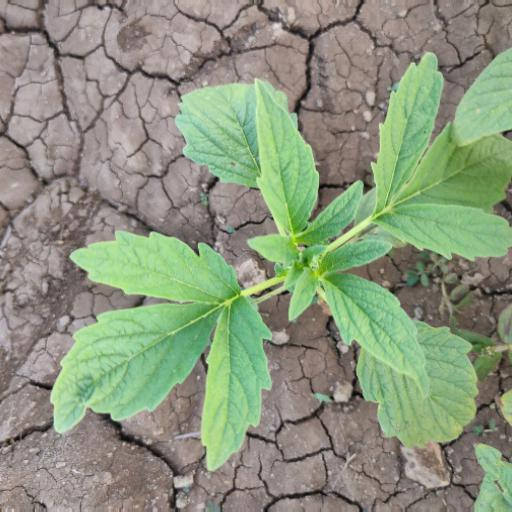



vvv


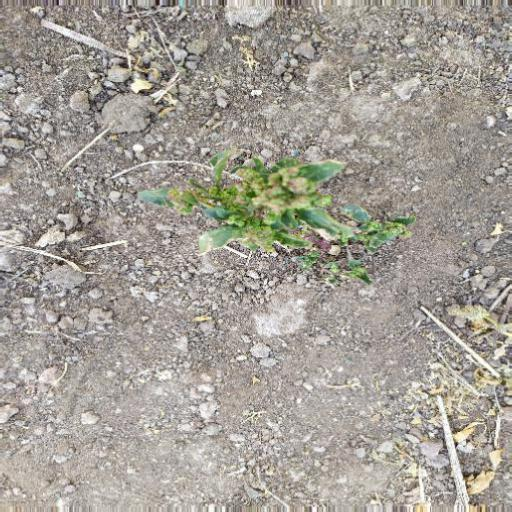



vvv


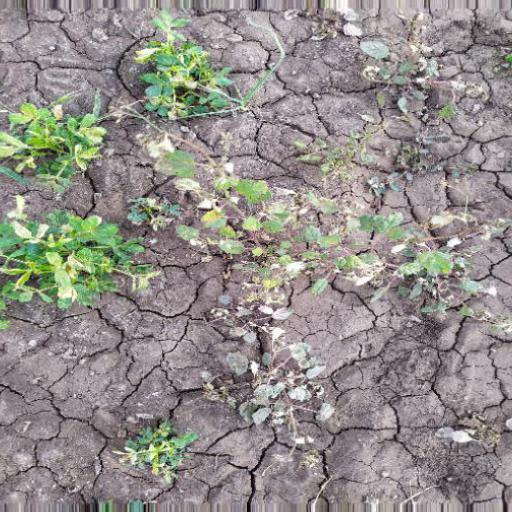



vvv


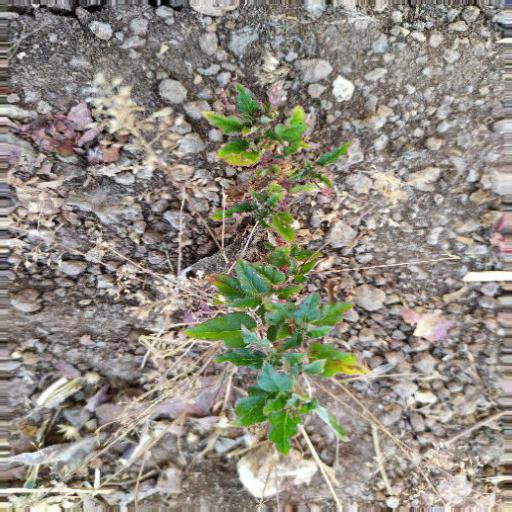



vvv


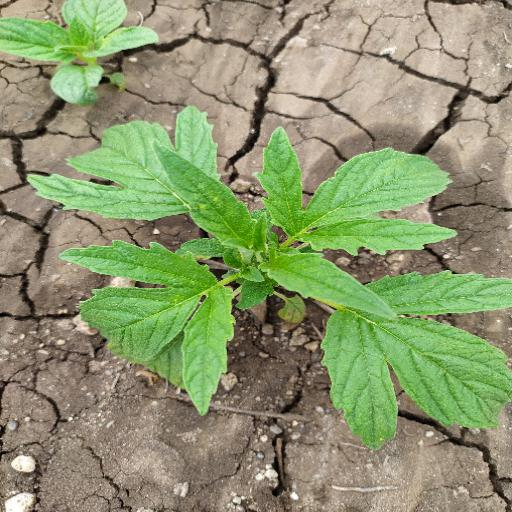



vvv


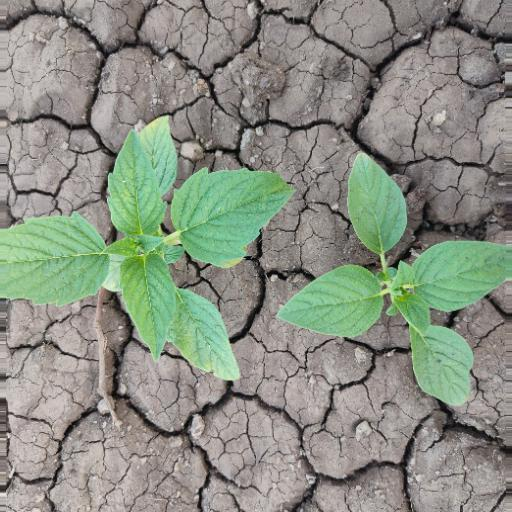



vvv


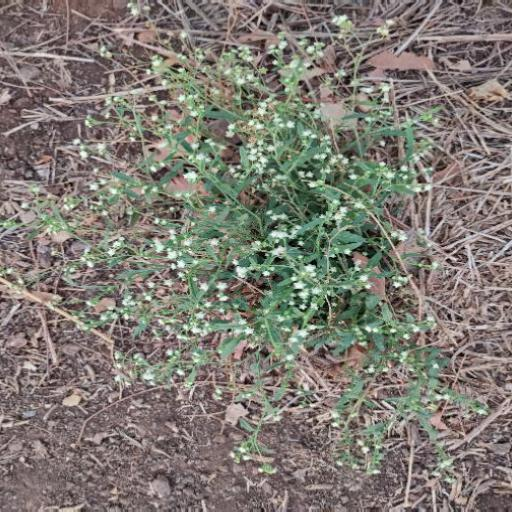



vvv


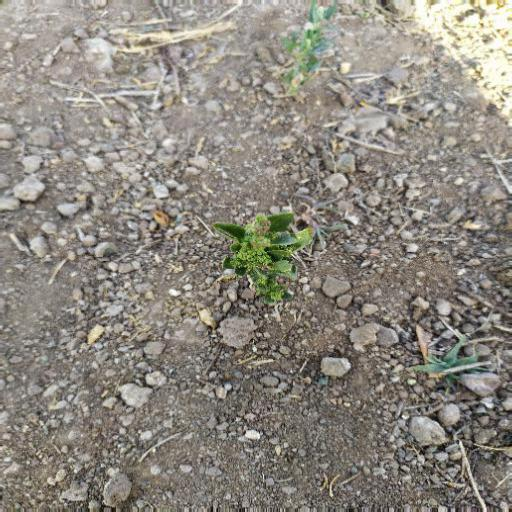



vvv


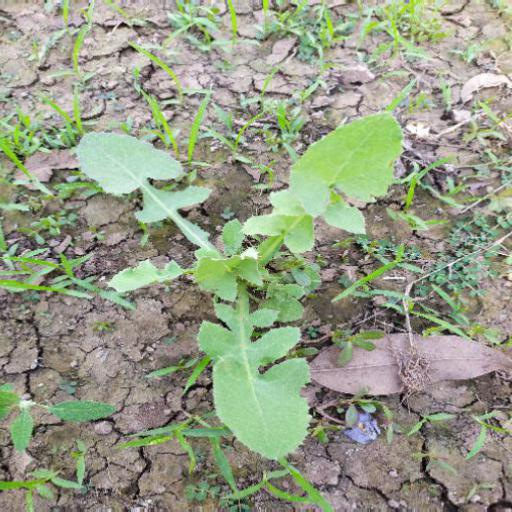



vvv


In [10]:
import glob
from IPython.display import Image, display
print("vvv")
for image_path in glob.glob(r"F:\ChaosAll\Weed Detection\yolo_test\test_images\*.jpeg"):
    display(Image(filename=image_path, height=640))
    print('\n')
    print("vvv")